In [1]:
import pandas as pd
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df.head(3)

c:\Users\Darvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."


In [2]:
df.iloc[:5,[1,2]]

,job_title,job_location
0,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT"
1,Data Analyst,"Guadalajara, Jalisco, Mexico"
2,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany"
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX"
4,Data Engineer- Sr Jobs,"Washington, DC"


In [3]:
df.loc[5:9][['job_title_short','job_skills']]

,job_title_short,job_skills
5,Data Engineer,"['python', 'sql', 'gcp']"
6,Senior Data Engineer,"['sql', 'python', 'java', 'sql server', 'gcp',..."
7,Data Engineer,"['sql', 'nosql', 'gcp', 'azure', 'aws', 'bigqu..."
8,Business Analyst,"['excel', 'powerpoint', 'power bi']"
9,Data Scientist,"['sql', 'python', 'r', 'mongodb', 'mongodb', '..."


In [4]:
df_us = df[df['job_country'] == 'United States']
df_us[['job_title','salary_year_avg']].iloc[:15]

,job_title,salary_year_avg
0,Senior Clinical Data Engineer / Principal Clin...,NaN
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,NaN
5,GCP Data Engineer,NaN
6,Senior Data Engineer - GCP Cloud,NaN
9,Data Scientist II,NaN
11,Data Engineer,NaN
13,Senior Data Engineer,NaN
17,Data Science Team Lead,NaN
26,Data Engineer,NaN
27,"Principal Data Engineer (Lead), Knowledge Grap...",NaN


In [5]:
df.loc[df['job_posted_date'] > '2023-05-01',['job_title', 'job_location','job_posted_date']]

,job_title,job_location,job_posted_date
0,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",2023-06-16 13:44:15
2,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",2023-10-10 13:14:55
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",2023-07-04 13:01:41
4,Data Engineer- Sr Jobs,"Washington, DC",2023-08-07 14:29:36
5,GCP Data Engineer,Anywhere,2023-11-07 14:01:59
...,...,...,...
785694,Data Engineer,"Graz, Austria",2023-05-07 07:07:37
785696,Senior Analytics Engineer,"Colombia, Huila, Colombia",2023-10-23 06:31:25
785698,"Data Engineer, Gerencia Business Intelligence","Las Condes, Chile",2023-08-09 06:32:00
785701,"Data Engineer, Gerencia Business Intelligence","Santiago, Chile",2023-08-09 06:31:57


In [6]:
rows_before = df.shape[0]
df_cleaned = df.dropna(subset=['salary_year_avg'])
rows_after = df_cleaned.shape[0]
rows_before,rows_after

(785741, 22003)

In [7]:
rows_before1 = df.shape[0]
df_cleaned1 = df.drop_duplicates(subset=['job_location'])
rows_after1 = df_cleaned1.shape[0]
rows_before1,rows_after1

(785741, 17218)

In [8]:
row_unfill = df['salary_rate'].head(10)
df_fill=df.fillna({'salary_rate':'Unknown'})
row_fill =df_fill['salary_rate'].head(10)
row_unfill,row_fill

(0    None
 1    None
 2    None
 3    None
 4    None
 5    None
 6    None
 7    None
 8    None
 9    None
 Name: salary_rate, dtype: object,
 0    Unknown
 1    Unknown
 2    Unknown
 3    Unknown
 4    Unknown
 5    Unknown
 6    Unknown
 7    Unknown
 8    Unknown
 9    Unknown
 Name: salary_rate, dtype: object)

In [9]:
df_copy = df.copy()
df_cleaned = df_copy.dropna(subset=['salary_year_avg'])
df_cleaned.head(5)


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
28,Data Scientist,CRM Data Specialist,"San José Province, San José, Costa Rica",via Ai-Jobs.net,Full-time,False,Costa Rica,2023-08-01 13:37:57,False,False,Costa Rica,year,109500.0,NaN,Netskope,"['gdpr', 'excel']","{'analyst_tools': ['excel'], 'libraries': ['gd..."
77,Data Engineer,Data Engineer,"Arlington, VA",via LinkedIn,Full-time,False,Sudan,2023-06-26 14:22:54,False,False,Sudan,year,140000.0,NaN,Intelletec,"['mongodb', 'mongodb', 'python', 'r', 'sql', '...","{'analyst_tools': ['tableau'], 'cloud': ['orac..."
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"['sql', 'python']","{'programming': ['sql', 'python']}"
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"['sql', 'r', 'python', 'express']","{'programming': ['sql', 'r', 'python'], 'webfr..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"['python', 'r', 'alteryx', 'tableau']","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."


In [10]:
df_sample = df.sample(frac=0.1)
df_sample.head(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
442091,Business Analyst,Business Analyst Intern,"Hollywood, FL",via Florida Jobs - Tarta.ai,Full-time,False,"Florida, United States",2023-02-09 00:02:16,False,False,United States,None,NaN,NaN,"Silver Airways, LLC","['python', 'r', 'sql', 'power bi', 'excel', 'd...","{'analyst_tools': ['power bi', 'excel', 'dax']..."
104009,Senior Data Analyst,Senior data analyst,"Pasadena, CA",via Talent.com,Full-time,False,"California, United States",2023-01-26 00:01:05,True,False,United States,None,NaN,NaN,East West Bank,"['python', 'r', 'c#', 'shell', 'azure', 'datab...","{'analyst_tools': ['power bi'], 'cloud': ['azu..."
264875,Data Engineer,Quality Monitoring Feedback Analyst,"Dublin, Ireland",via Trabajo.org,Full-time,False,Ireland,2023-04-01 07:09:45,True,False,Ireland,None,NaN,NaN,Accenture,None,None
116011,Data Analyst,Analyst - Rewards Data Intelligence - Internsh...,"Shanghai, China",via Trabajo.org,Full-time and Internship,False,China,2023-11-15 08:35:16,False,False,China,None,NaN,NaN,WTW,None,None
96820,Senior Data Scientist,Senior Data Scientist,United Kingdom,via Recruit.net,Full-time,False,United Kingdom,2023-11-26 00:11:05,False,False,United Kingdom,None,NaN,NaN,Formula Recruitment,"['python', 'r', 'tensorflow', 'pytorch', 'pand...","{'libraries': ['tensorflow', 'pytorch', 'panda..."


In [11]:
df_copy_1 = df.copy()
Median =df_copy_1['salary_year_avg'].median()
df_copy_1.fillna(value=Median).head(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,115000.0,115000.0,115000.0,Boehringer Ingelheim,115000.0,115000.0
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,115000.0,115000.0,115000.0,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,115000.0,115000.0,115000.0,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,115000.0,115000.0,115000.0,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,115000.0,115000.0,115000.0,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


<Axes: ylabel='job_title_short,job_country'>

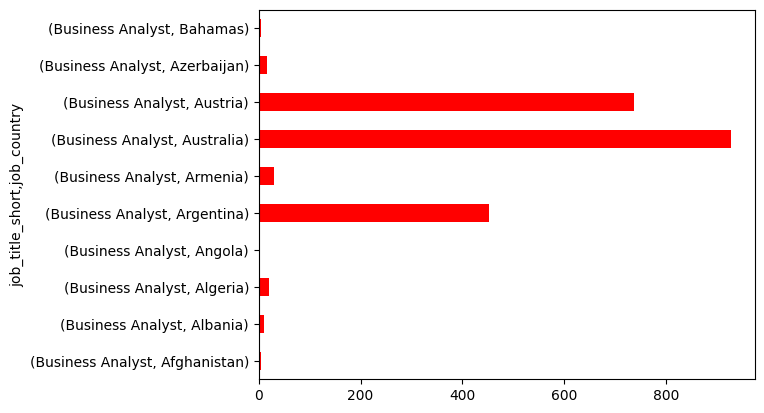

In [12]:
lm1 =df.pivot_table(index=['job_title_short','job_country'], aggfunc='size').head(10)
lm1.plot(kind='barh',color='red')

In [13]:
df.pivot_table(values='salary_year_avg',index='company_name',aggfunc=['max','min','mean']).head(5)

,max,min,mean
,salary_year_avg,salary_year_avg,salary_year_avg
company_name,,,
#twiceasnice Recruiting,120000.000000,61000.000000,77750.000000
/dev/color,125000.000000,125000.000000,125000.000000
0nward Select,92500.000000,92500.000000,92500.000000
1 Point System,137290.484375,137290.484375,137290.484375
1 Point System LLC.,170000.000000,170000.000000,170000.000000


In [14]:
df_DE=df[df['job_title_short'] == 'Data Scientist'].copy()

pt = df_DE.pivot_table(values='salary_year_avg', index=['company_name', 'job_country'], aggfunc='median')
filter = pt[pt['salary_year_avg'] > 200000]
filter.head(10)

salary_year_avg
company_name        job_country                   
ACT                 Sudan                 225000.0
                    United States         225000.0
Abbott              United States         204000.0
Airbnb              United States         212500.0
Airtable            Sudan                 215500.0
                    United States         233500.0
Algo Capital Group  Sudan                 325000.0
                    United States         350000.0
Amadeus Search      United States         232500.0
Analog Devices, Inc United States         375000.0

In [15]:
import pandas as pd
from datasets import load_dataset
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df.set_index('job_posted_date', inplace=True)
df.head(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
job_posted_date,,,,,,,,,,,,,,,,
2023-06-16 13:44:15,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
2023-01-14 13:18:07,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2023-10-10 13:14:55,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
2023-07-04 13:01:41,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
2023-08-07 14:29:36,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [16]:
import pandas as pd
from datasets import load_dataset
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df.set_index('job_posted_date', inplace=True) # This is code from the last problem
df.reset_index(drop=True, inplace=True)
df.head(5)


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [17]:
pt_1 = df.pivot_table(values='salary_year_avg', index ='company_name', aggfunc='median')
pt_1.sort_index(inplace=True)
pt_1.head(5)

,salary_year_avg
company_name,
#twiceasnice Recruiting,65000.000000
/dev/color,125000.000000
0nward Select,92500.000000
1 Point System,137290.484375
1 Point System LLC.,170000.000000


In [18]:
pt_2 = df.pivot_table(values='salary_year_avg',index = 'job_title_short',aggfunc='median')
pt_2.reset_index(inplace=True)
pt_2.set_index('salary_year_avg', inplace=True)
pt_2.head(5)

,job_title_short
salary_year_avg,
85000.0,Business Analyst
90000.0,Cloud Engineer
90000.0,Data Analyst
125000.0,Data Engineer
127500.0,Data Scientist


In [19]:
import pandas as pd
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_posted_month'] = df['job_posted_date'].dt.to_period('M')
df_us_jobs = df[df['job_country'] == 'India' ]

df_monthly_postings = df.groupby('job_posted_month').size().reset_index(name='postings_count')

In [20]:
merged_df = pd.merge(df_us_jobs , df_monthly_postings, on= 'job_posted_month', how='right')
merged_df.head(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,postings_count
0,Data Analyst,Data Base work from home job/internship at Mga...,Anywhere,via LinkedIn,Full-time,True,India,2023-01-14 13:11:58,False,False,India,None,NaN,NaN,Mgadz Inc,"['sas', 'sas', 'sql']","{'analyst_tools': ['sas'], 'programming': ['sa...",2023-01,91822
1,Data Engineer,Data Engineer (Third Party & Integration),Anywhere,via Indeed,Full-time,True,India,2023-01-30 13:12:22,True,False,India,None,NaN,NaN,KNOREX,"['python', 'mongo', 'node.js']","{'programming': ['python', 'mongo'], 'webframe...",2023-01,91822
2,Data Scientist,Regalix India - Data Scientist - Machine Learn...,"Bengaluru, Karnataka, India",via Adzuna,Full-time,False,India,2023-01-19 13:51:46,False,False,India,None,NaN,NaN,Regalix India Pvt Ltd,"['sas', 'sas', 'tableau']","{'analyst_tools': ['sas', 'tableau'], 'program...",2023-01,91822
3,Data Scientist,Data analyst / Data scientist,"Mumbai, Maharashtra, India",via Shine.com,Full-time,False,India,2023-01-13 13:13:34,False,False,India,None,NaN,NaN,GFL RECRUITMENT PRIVATE LIMITED,None,None,2023-01,91822
4,Data Analyst,Analyst-Master Data Management - Global Rates-GFS,"Hyderabad, Telangana, India",via Indeed,Full-time,False,India,2023-01-10 13:27:23,False,False,India,None,NaN,NaN,Deloitte,"['sap', 'excel']","{'analyst_tools': ['sap', 'excel']}",2023-01,91822


In [21]:
df_not_remote_jobs = df[df['job_work_from_home'] == False]
df_not_remote_salary = df_not_remote_jobs.groupby('job_title_short')['salary_year_avg'].mean().reset_index()
merged_df_1 = pd.merge(df,df_not_remote_salary, on='job_title_short', how='right')
merged_df_1.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg_x,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,salary_year_avg_y
0,Business Analyst,Technology & Operations Business Analyst,"Copenhagen, Denmark",via Trabajo.org,Full-time,False,Denmark,2023-06-05 13:44:34,False,False,Denmark,None,NaN,NaN,Hempel,"['excel', 'powerpoint', 'power bi']","{'analyst_tools': ['excel', 'powerpoint', 'pow...",2023-06,90177.41994
1,Business Analyst,Business Intelligence Intern,"Dallas, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 13:02:07,False,False,United States,None,NaN,NaN,Copart,"['r', 'python', 'sql', 'tableau', 'power bi']","{'analyst_tools': ['tableau', 'power bi'], 'pr...",2023-01,90177.41994
2,Business Analyst,BI Engineer,Namibia,via Intellijobs.ai,Full-time,False,Namibia,2023-03-05 14:10:49,False,False,Namibia,None,NaN,NaN,Innover,"['sql', 'gcp', 'looker', 'tableau']","{'analyst_tools': ['looker', 'tableau'], 'clou...",2023-03,90177.41994


In [22]:
df_company_salary = df.groupby('company_name')['salary_year_avg'].mean().reset_index()
df_company_remote = df[df['job_work_from_home'] == True].groupby('company_name').size().reset_index(name='remote_count')
merged_df = pd.merge(df_company_salary, df_company_remote, on='company_name', how='inner')
merged_df.head(5)

,company_name,salary_year_avg,remote_count
0,#EqualsTrue,NaN,4
1,#TeamGoHealth,NaN,1
2,#twiceasnice Recruiting,77750.0,1
3,&Work,NaN,1
4,"(AEG) Application Engineering Group, Inc.",NaN,1


In [23]:
data_scientist_df = df[df['job_title'] == 'Data Scientists']
data_analyst_df = df[df['job_title'] == 'Data Analysts']
combined_df = pd.concat([data_scientist_df,data_analyst_df], ignore_index=True)
combined_df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Data Scientist,Data Scientists,"Helsinki, Finland",via Trabajo.org,Full-time,False,Finland,2023-07-21 13:54:16,False,False,Finland,None,NaN,NaN,ICT DIRECT,"['go', 'sql', 'java', 'ruby', 'ruby', 'scala',...","{'programming': ['go', 'sql', 'java', 'ruby', ...",2023-07
1,Data Scientist,Data Scientists,"Austin, TX",via BeBee,Full-time,False,"Texas, United States",2023-11-10 13:22:37,False,False,United States,None,NaN,NaN,Aldertonrowe,"['sql', 'tableau']","{'analyst_tools': ['tableau'], 'programming': ...",2023-11
2,Data Scientist,Data Scientists,"St. Louis, MO",via BeBee,Full-time,False,"Illinois, United States",2023-11-10 13:22:58,False,False,United States,None,NaN,NaN,Procession Systems,"['python', 'sql', 'pyspark', 'gitlab']","{'libraries': ['pyspark'], 'other': ['gitlab']...",2023-11
3,Data Scientist,Data Scientists,"Graz, Austria",via BeBee,Full-time,False,Austria,2023-07-04 13:25:09,False,False,Austria,None,NaN,NaN,Aeroficial Intelligence GmbH,"['python', 'sql', 'scala', 'java', 'azure']","{'cloud': ['azure'], 'programming': ['python',...",2023-07
4,Data Scientist,Data Scientists,Namibia,via Intellijobs.ai,Full-time,False,Namibia,2023-01-31 14:28:46,False,False,Namibia,None,NaN,NaN,Xtage Labs,"['r', 'python', 'express', 'tableau', 'power bi']","{'analyst_tools': ['tableau', 'power bi'], 'pr...",2023-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,Data Analyst,Data Analysts,Ireland,via BeBee Ireland,Full-time,False,Ireland,2023-08-23 20:24:20,False,False,Ireland,None,NaN,NaN,Back4good,['sql'],{'programming': ['sql']},2023-08
230,Data Analyst,Data Analysts,"Boston, MA",via Melga,Full-time,False,"New York, United States",2023-02-20 01:00:31,False,False,United States,None,NaN,NaN,"Langan Engineering And Environmental Services,...",None,None,2023-02
231,Data Analyst,Data Analysts,Australia,via BeBee Australia,Full-time,False,Australia,2023-10-12 01:12:44,True,False,Australia,None,NaN,NaN,HiTech Group,"['sql', 'r', 'python', 'go']","{'programming': ['sql', 'r', 'python', 'go']}",2023-10
232,Data Analyst,Data Analysts,India,via Trabajo.org,Full-time,False,India,2023-07-23 01:09:44,False,False,India,None,NaN,NaN,timesascent,['spss'],{'analyst_tools': ['spss']},2023-07


In [24]:
oct_df = df[df['job_posted_date'].dt.month == 10]
nov_df = df[df['job_posted_date'].dt.month == 11]
dec_df = df[df['job_posted_date'].dt.month == 12]

combined_df_m = pd.concat([oct_df, nov_df, dec_df], ignore_index=True)
combined_df_m.head(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",2023-10
1,Data Engineer,Data Engineer,"Aberdeen, UK",via LinkedIn,Temp work,False,United Kingdom,2023-10-19 13:37:16,False,False,United Kingdom,None,NaN,NaN,Orion Group,"['python', 'sql', 'power bi']","{'analyst_tools': ['power bi'], 'programming':...",2023-10
2,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"['sql', 'python', 'r', 'redshift', 'pandas', '...","{'analyst_tools': ['excel', 'looker', 'tableau...",2023-10
3,Data Analyst,Stage - Data Analyst F/H,"Paris, France",via LinkedIn,Full-time and Internship,False,France,2023-10-19 13:59:31,False,False,France,None,NaN,NaN,GROUPE BON MARCHÉ : Le Bon Marché Rive Gauche ...,['sql'],{'programming': ['sql']},2023-10
4,Data Analyst,"Data Analyst (Bangkok Based, relocation provided)","Rome, Metropolitan City of Rome Capital, Italy",via LinkedIn,Full-time,False,Italy,2023-10-30 13:13:21,False,False,Italy,None,NaN,NaN,Agoda,"['sas', 'sas', 'r', 'python', 'vba', 'sql', 'j...","{'analyst_tools': ['sas', 'spss', 'tableau', '...",2023-10


In [25]:
full_time_df = df[df['job_schedule_type'] == 'Full-time']
part_time_df = df[df['job_schedule_type'] == 'Part-time']
combined_df_job = pd.concat([full_time_df,part_time_df], ignore_index=True)
combined_df_job.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,2023-06
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",2023-01
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",2023-10


In [26]:
df.to_csv('data_jobs_export.csv', index = False)
df.head(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,2023-06
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",2023-01
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",2023-10
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",2023-07
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl...",2023-08


In [27]:
df_filtered = df[df['job_title_short'] == 'Data Scientist']
df_filtered.to_csv('data_scientist_job.csv', index=False)
df_filtered.head(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'...",2023-04
17,Data Scientist,Data Science Team Lead,"Laurel, MD",via APL Careers - Johns Hopkins University App...,Full-time,False,Georgia,2023-06-13 13:25:17,False,True,United States,None,NaN,NaN,Johns Hopkins Applied Physics Laboratory,"['go', 'apl', 'excel']","{'analyst_tools': ['excel'], 'programming': ['...",2023-06
19,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Indeed,Full-time,False,India,2023-04-26 13:20:12,False,False,India,None,NaN,NaN,Bitwise Solutions,"['r', 'sql', 'python', 'scala', 'java', 'c++',...","{'analyst_tools': ['tableau'], 'libraries': ['...",2023-04
20,Data Scientist,Data Scientist,"Zaventem, Belgium",via BeBee Belgique,Full-time,False,Belgium,2023-01-31 13:53:38,False,False,Belgium,None,NaN,NaN,Devoteam,"['r', 'python', 'sql', 'pandas', 'numpy', 'sci...","{'libraries': ['pandas', 'numpy', 'scikit-lear...",2023-01
21,Data Scientist,Stage - data scientist – génération ia de donn...,"Asnières-sur-Seine, France",via Jobijoba,Full-time,False,France,2023-02-23 13:41:21,False,False,France,None,NaN,NaN,Credit Agricole,None,None,2023-02


In [28]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [29]:
import openpyxl
df_filtered_E = df[df['job_location'] == 'New York, NY']
df_filtered_E.to_excel('new_york_jobs.xlsx', index=False)
df_filtered_E.head(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
13,Senior Data Engineer,Senior Data Engineer,"New York, NY",via LinkedIn,Full-time,False,"Texas, United States",2023-11-15 13:08:52,True,True,United States,None,NaN,NaN,Nayya,"['python', 'sql', 'go', 'ruby', 'ruby', 'javas...","{'cloud': ['aws'], 'other': ['terraform'], 'pr...",2023-11
126,Data Engineer,Data Engineer,"New York, NY",via LinkedIn,Full-time,False,"New York, United States",2023-05-08 13:08:15,False,True,United States,None,NaN,NaN,Career Search Partners,"['sql', 'python', 'sql server', 'excel', 'flow...","{'analyst_tools': ['excel'], 'databases': ['sq...",2023-05
177,Senior Data Engineer,Cyber Senior Data Engineer,"New York, NY",via LinkedIn,Full-time,False,"Illinois, United States",2023-12-22 13:06:34,False,False,United States,None,NaN,NaN,New York City Office of Technology & Innovation,"['java', 'python', 'r', 'gcp', 'aws', 'azure',...","{'cloud': ['gcp', 'aws', 'azure'], 'libraries'...",2023-12
230,Data Analyst,Financial Systems – Business Analyst/ Data Ana...,"New York, NY",via Redstream Technology,Full-time,False,"New York, United States",2023-06-25 13:00:01,False,False,United States,None,NaN,NaN,RedStream Technology,"['sql', 'excel', 'visio', 'powerpoint', 'word']","{'analyst_tools': ['excel', 'visio', 'powerpoi...",2023-06
502,Data Analyst,Reporting Data Analyst,"New York, NY",via ZipRecruiter,Full-time,False,"New York, United States",2023-10-18 13:00:14,True,False,United States,None,NaN,NaN,Arsenault,"['sql', 'excel', 'microstrategy']","{'analyst_tools': ['excel', 'microstrategy'], ...",2023-10


In [30]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_posted_date_str'] = df['job_posted_date'].apply(lambda x: x.strftime('%Y-%m-%d'))
df[['job_posted_date', 'job_posted_date_str']].head(5)

,job_posted_date,job_posted_date_str
0,2023-06-16 13:44:15,2023-06-16
1,2023-01-14 13:18:07,2023-01-14
2,2023-10-10 13:14:55,2023-10-10
3,2023-07-04 13:01:41,2023-07-04
4,2023-08-07 14:29:36,2023-08-07


In [31]:
pip install datetime

Note: you may need to restart the kernel to use updated packages.


In [32]:
import pandas as pd
from datasets import load_dataset
import datetime

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
current_date = datetime.datetime.now()
df['days_since_posted'] = df['job_posted_date'].apply(lambda date: (current_date - date).days)
df[['job_posted_date', 'days_since_posted']].head()

,job_posted_date,days_since_posted
0,2023-06-16 13:44:15,369
1,2023-01-14 13:18:07,522
2,2023-10-10 13:14:55,253
3,2023-07-04 13:01:41,351
4,2023-08-07 14:29:36,317


In [33]:
df_filtered_2 = df.dropna(subset=['salary_year_avg']).copy()
df_filtered_2['salary_category'] = df['salary_year_avg'].apply(lambda salary:"Low" if salary < 60000 else 'Medium' if salary <= 100000 else 'High')
df_filtered_2[['salary_year_avg','salary_category']]

,salary_year_avg,salary_category
28,109500.0,High
77,140000.0,High
92,120000.0,High
100,228222.0,High
109,89000.0,Medium
...,...,...
785624,139216.0,High
785641,150000.0,High
785648,221875.0,High
785682,157500.0,High


In [34]:
pip install ast

  Using cached AST-0.0.2.tar.gz (19 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [21 lines of output]
      Traceback (most recent call last):
        File "c:\Users\Darvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
        File "c:\Users\Darvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "c:\Users\Darvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 118, in get_requires_for_build_wheel
          return hook(config_settings)
                 ^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\Darvi\AppData\Local\Temp\pip-build-env-8bilimvc\

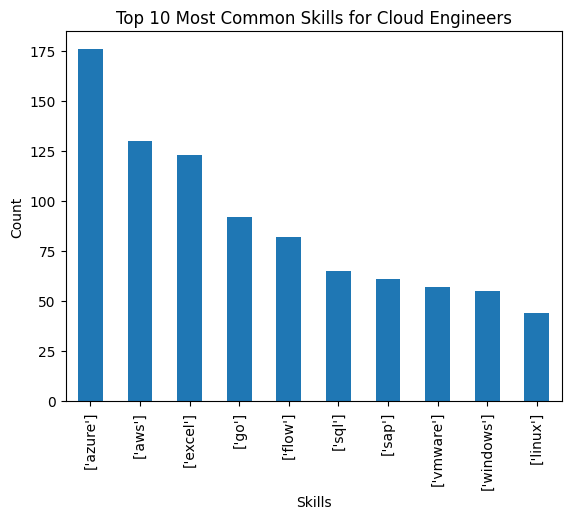

In [35]:
import ast 
import matplotlib.pyplot as plt
df_CE = df[df['job_title_short'] == 'Cloud Engineer']
df_exploded = df_CE.explode('job_skills')
skill_counts = df_exploded['job_skills'].value_counts().head(10)
skill_counts.plot(kind='bar')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.title('Top 10 Most Common Skills for Cloud Engineers')
plt.show()

In [36]:
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df_exploded = df.explode('job_skills')
skill_salary_avg = df_exploded.groupby('job_skills')['salary_year_avg'].mean().reset_index()
skill_salary_avg = skill_salary_avg.sort_values(by='salary_year_avg', ascending=False).head(5)
skill_salary_avg


,job_skills,salary_year_avg
46,debian,196500.000000
177,ringcentral,182500.000000
114,lua,170500.000000
126,mongo,169526.929749
54,dplyr,160667.210526


In [37]:
import pandas as pd
from datasets import load_dataset
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df_exploded = df.explode('job_skills')

# Group by 'job_title_short' and count unique skills
unique_skills_count = df_exploded.groupby('job_title_short')['job_skills'].nunique().reset_index()
unique_skills_count.columns = ['job_title_short', 'num_unique_skills']
unique_skills_count.head(5)

,job_title_short,num_unique_skills
0,Business Analyst,223
1,Cloud Engineer,213
2,Data Analyst,235
3,Data Engineer,239
4,Data Scientist,237


Matplotlib

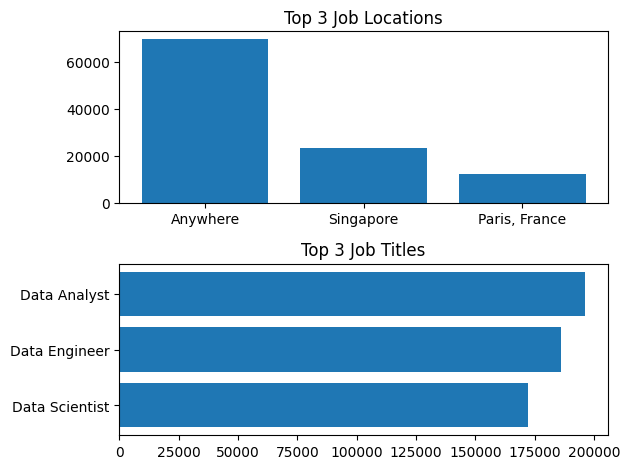

In [38]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
fig, ax = plt.subplots(2, 1)

# Top 3 job locations
job_locations = df['job_location'].value_counts().head(3)
ax[0].bar(job_locations.index, job_locations.values)
ax[0].set_title('Top 3 Job Locations')

# Top 3 job titles
job_titles = df['job_title_short'].value_counts().head(3)
ax[1].barh(job_titles.index, job_titles.values)
ax[1].set_title('Top 3 Job Titles')
ax[1].invert_yaxis()

fig.tight_layout()
plt.show()

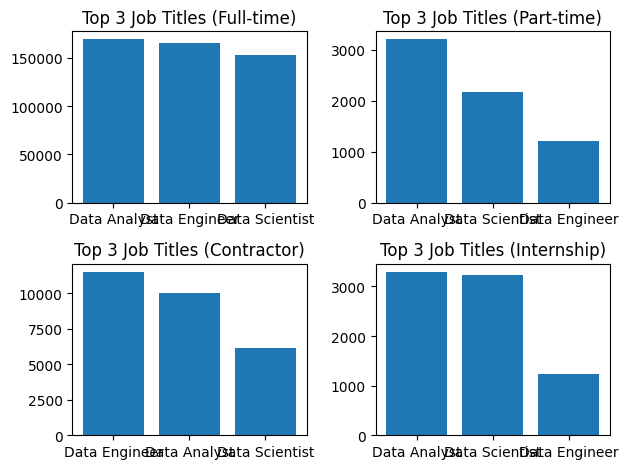

In [39]:
fig, ax = plt.subplots(2, 2)

# Job schedule types
schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']

for i, schedule in enumerate(schedules):
    df_schedule = df[df['job_schedule_type'] == schedule]
    job_titles = df_schedule['job_title_short'].value_counts().head(3)
    ax[i//2, i%2].bar(job_titles.index, job_titles.values)
    ax[i//2, i%2].set_title(f'Top 3 Job Titles ({schedule})')

fig.tight_layout()
plt.show()


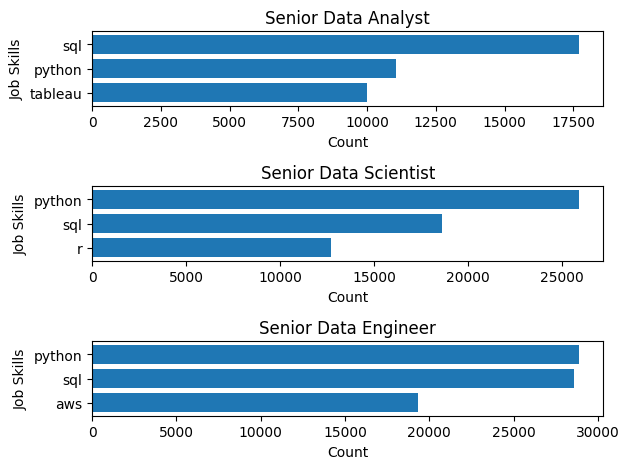

In [40]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df_skills = df.explode('job_skills')
job_roles = ['Senior Data Analyst', 'Senior Data Scientist', 'Senior Data Engineer']
fig, ax = plt.subplots(len(job_roles), 1)
for i, role in enumerate(job_roles):
    role_skills = df_skills[df_skills['job_title_short'] == role]['job_skills'].value_counts().head(3)
    ax[i].barh(role_skills.index, role_skills.values)
    ax[i].set_title(role)
    ax[i].set_xlabel('Count')
    ax[i].set_ylabel('Job Skills')
    ax[i].invert_yaxis()
fig.tight_layout()
plt.show()

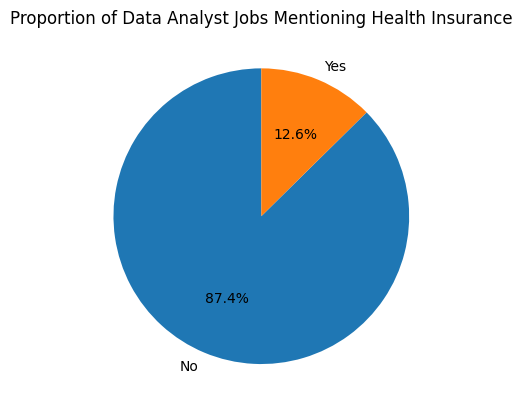

In [41]:
df_DA = df[df['job_title_short'] == 'Data Analyst']
health_insurance_count = df_DA['job_health_insurance'].value_counts()
plt.pie(health_insurance_count, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Data Analyst Jobs Mentioning Health Insurance')
plt.show()

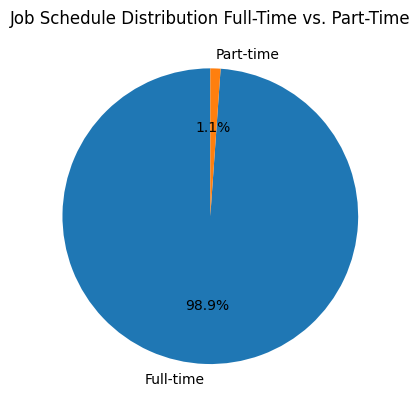

In [42]:
df_ft_pt = df[(df['job_schedule_type'] == 'Full-time') | (df['job_schedule_type'] == 'Part-time')]
job_schedule_counts = df_ft_pt['job_schedule_type'].value_counts()
plt.pie(job_schedule_counts, labels=job_schedule_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Job Schedule Distribution Full-Time vs. Part-Time')
plt.show()

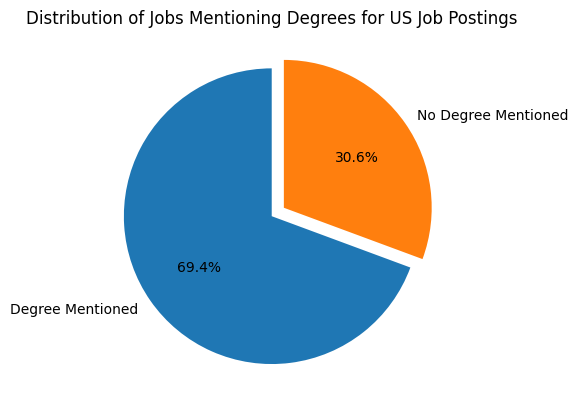

In [43]:
df_US = df[df['job_country'] == 'United States']
degree_counts = df['job_no_degree_mention'].value_counts()
plt.pie(degree_counts, labels=['Degree Mentioned', 'No Degree Mentioned'], autopct='%1.1f%%', startangle=90, explode=(0, 0.1))
plt.title('Distribution of Jobs Mentioning Degrees for US Job Postings')
plt.show()

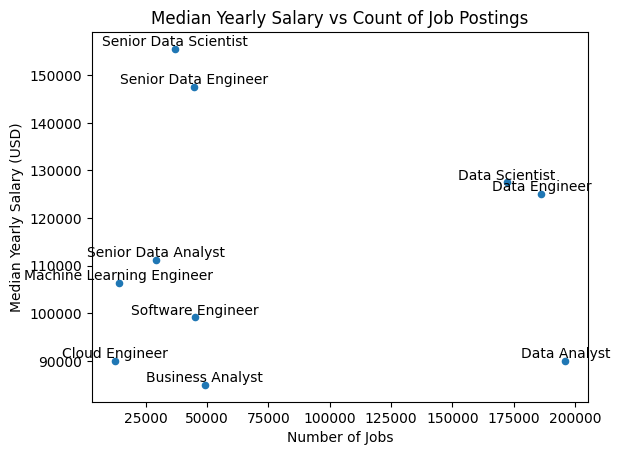

In [44]:
# Group data by job title and calculate average yearly salary and job count
job_title_stats = df.groupby('job_title_short').agg(
 median_salary_year_avg=('salary_year_avg', 'median'),
 job_count=('job_title_short', 'count')
).dropna()

# Plotting the results
job_title_stats.plot(kind='scatter', x='job_count', y='median_salary_year_avg')
plt.xlabel('Number of Jobs')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Median Yearly Salary vs Count of Job Postings')

# Adding job title labels to each point
for i in range(len(job_title_stats)):
 job_count = job_title_stats['job_count'].iloc[i]
 mean_salary = job_title_stats['median_salary_year_avg'].iloc[i]
 job_title = job_title_stats.index[i]
 plt.text(job_count, mean_salary, job_title, ha='center', va='bottom')

plt.show()

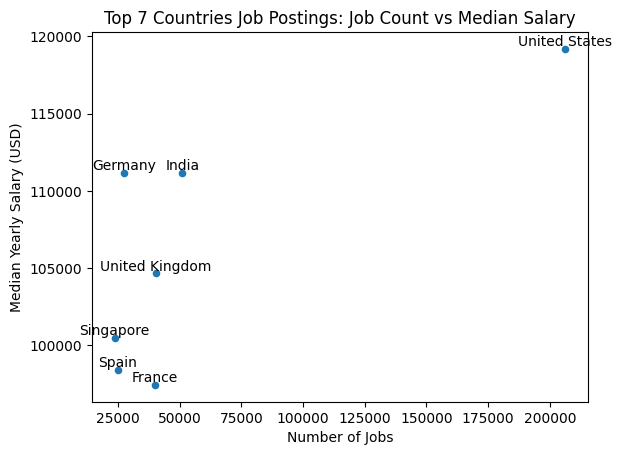

In [45]:
# Group data by country and calculate median hourly salary and job count
country_stats = df.groupby('job_country').agg(
 median_salary_year_avg=('salary_year_avg', 'median'),
 job_count=('job_country', 'count')
).dropna()

# Sort by job count in descending order and take the top 7
top_countries = country_stats.sort_values(by='job_count', ascending=False).head(7)

# Plotting the results
top_countries.plot(kind='scatter', x='job_count', y='median_salary_year_avg')
plt.xlabel('Number of Jobs')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Top 7 Countries Job Postings: Job Count vs Median Salary')

# Adding country labels to each point
for i in range(len(top_countries)):
 job_count = top_countries['job_count'].iloc[i]
 mean_salary = top_countries['median_salary_year_avg'].iloc[i]
 country = top_countries.index[i]
 plt.text(job_count, mean_salary, country, ha='center', va='bottom')

plt.show()

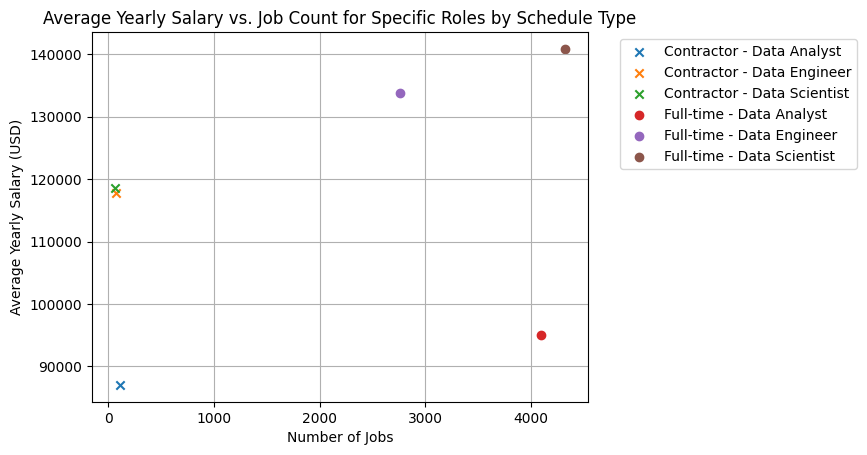

In [46]:
# Define specific job titles to include
target_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

# Filter US jobs for only full-time and part-time roles and specific job titles, then drop rows with missing salary data
us_jobs_df = df[
    (df['job_country'] == 'United States') &
    (df['job_schedule_type'].isin(['Full-time', 'Contractor'])) &
    (df['job_title_short'].isin(target_job_titles))
].dropna(subset=['salary_year_avg'])

# Group by job schedule type and job title, calculate mean yearly salary and job count
stats = us_jobs_df.groupby(['job_schedule_type', 'job_title_short']).agg(
    mean_salary_year_avg=('salary_year_avg', 'mean'),
    job_count=('job_title_short', 'count')
).dropna()

# Flatten the index to make plotting easier
stats.reset_index(inplace=True)

# Define markers for full-time and part-time jobs
markers = {'Full-time': 'o', 'Contractor': 'x'}

# Plotting the results, differentiating by job schedule type
for (schedule_type, job_title), group in stats.groupby(['job_schedule_type', 'job_title_short']):
    plt.scatter(group['job_count'], group['mean_salary_year_avg'], label=f'{schedule_type} - {job_title}', marker=markers[schedule_type])

plt.xlabel('Number of Jobs')
plt.ylabel('Average Yearly Salary (USD)')
plt.title('Average Yearly Salary vs. Job Count for Specific Roles by Schedule Type')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

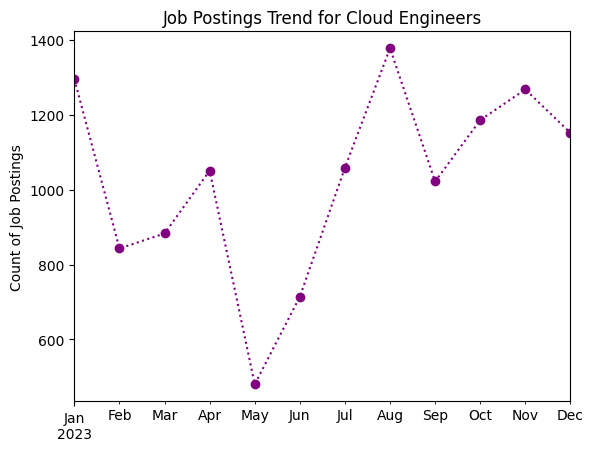

In [47]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df_ce = df[df['job_title_short'] == 'Cloud Engineer'].copy()
df_ce['job_posted_month'] = df_ce['job_posted_date'].dt.to_period('M')
monthly_job_postings = df_ce.groupby('job_posted_month').size()

monthly_job_postings.plot(
 kind='line', 
 linestyle=':', 
 color='purple', 
 marker='o'
 )
plt.title('Job Postings Trend for Cloud Engineers')
plt.ylabel('Count of Job Postings')
plt.xlabel('')
plt.show()

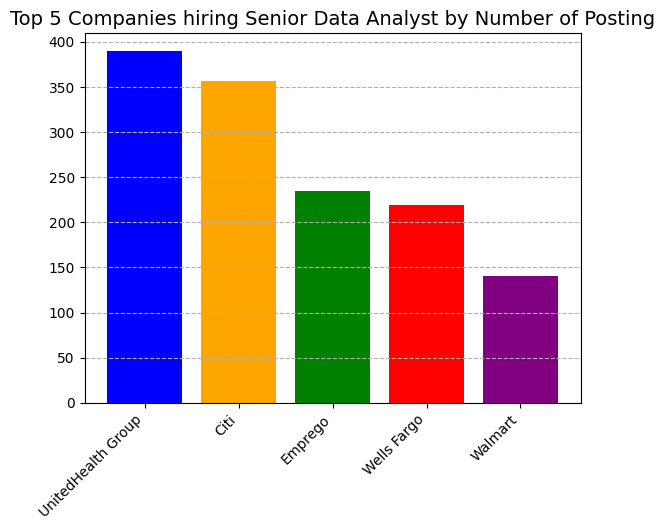

In [48]:
SDA_df = df[df['job_title_short'] == "Senior Data Analyst"].copy()

location_counts = SDA_df['company_name'].value_counts().head(5)

# Custom colors
colors = ['blue', 'orange', 'green', 'red', 'purple']

plt.bar(location_counts.index, location_counts.values, color = colors)
plt.title('Top 5 Companies hiring Senior Data Analyst by Number of Posting', fontsize = 14)
plt.xticks(rotation = 45, ha = 'right')
plt.grid(axis='y', linestyle='--')
plt.show()


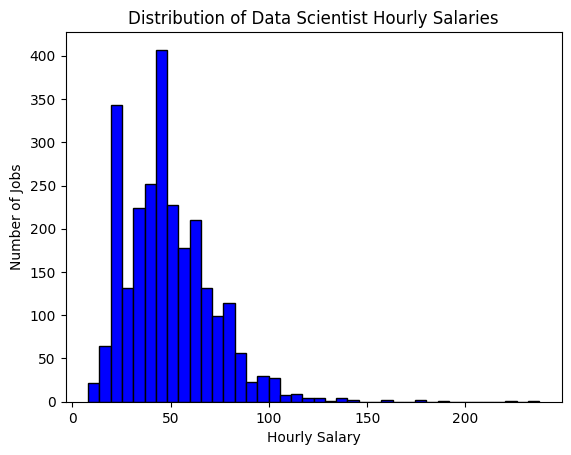

In [49]:
df_DS = df[df['job_title_short'] == 'Data Scientist'].copy()
df_DS = df_DS.dropna(subset=['salary_hour_avg'])

df_DS['salary_hour_avg'].plot(kind='hist', bins = 40 , color = 'blue', edgecolor='black')
plt.xlabel('Hourly Salary')
plt.ylabel('Number of Jobs')
plt.title('Distribution of Data Scientist Hourly Salaries')
plt.show()


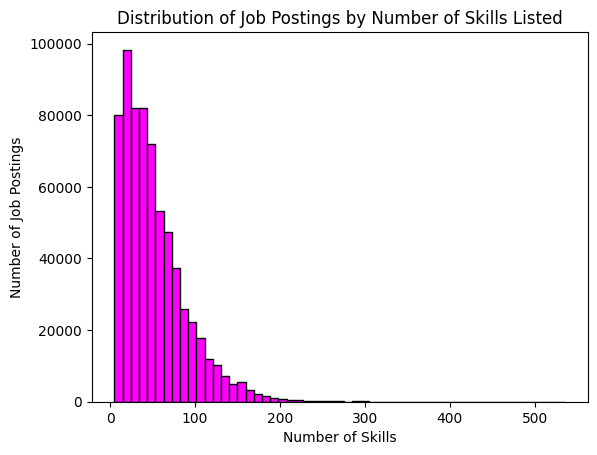

In [50]:
df_skills = df.dropna(subset=['job_skills']).copy()
df_skills['num_skills'] = df_skills['job_skills'].apply(len)

df_skills['num_skills'].plot(kind='hist', bins=55 , color='magenta', edgecolor='black')
plt.xlabel("Number of Skills")
plt.ylabel("Number of Job Postings")
plt.title('Distribution of Job Postings by Number of Skills Listed')
plt.show()

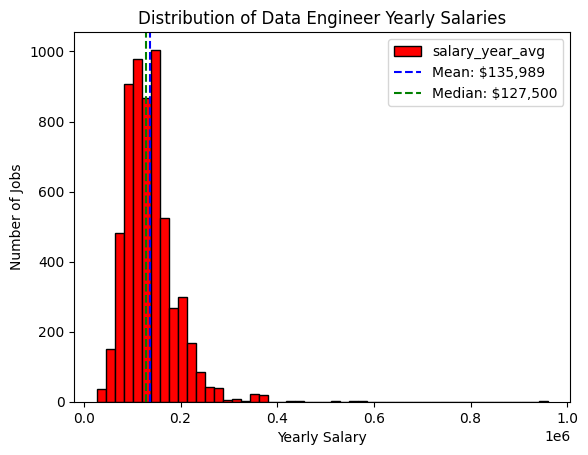

In [51]:
# Get mean and median
mean_salary = df_DE['salary_year_avg'].mean()
median_salary = df_DE['salary_year_avg'].median()

# Plot the histogram
df_DE['salary_year_avg'].plot(kind='hist', bins=50, color='red', edgecolor='black')
plt.axvline(mean_salary, color='blue', linestyle='dashed', label=f'Mean: ${mean_salary:,.0f}')
plt.axvline(median_salary, color='green', linestyle='dashed', label=f'Median: ${median_salary:,.0f}')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.title('Distribution of Data Engineer Yearly Salaries')
plt.legend()
plt.show()

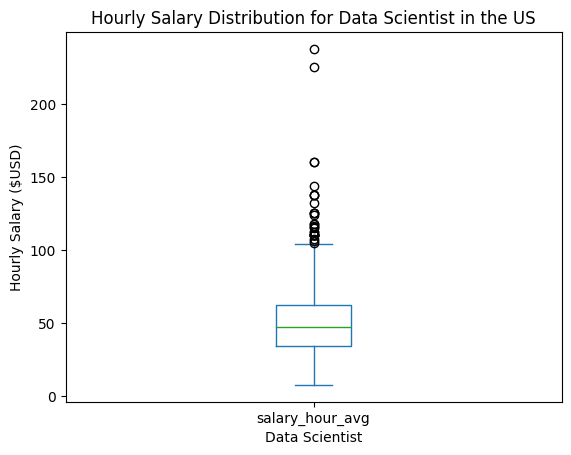

In [52]:
df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset=['salary_hour_avg'])

df_DS_US['salary_hour_avg'].plot(kind='box')
plt.xlabel('Data Scientist')
plt.ylabel('Hourly Salary ($USD)')
plt.title('Hourly Salary Distribution for Data Scientist in the US')
plt.show()

C:\Users\Darvi\AppData\Local\Temp\ipykernel_33420\938461738.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(country_data, labels=countries)


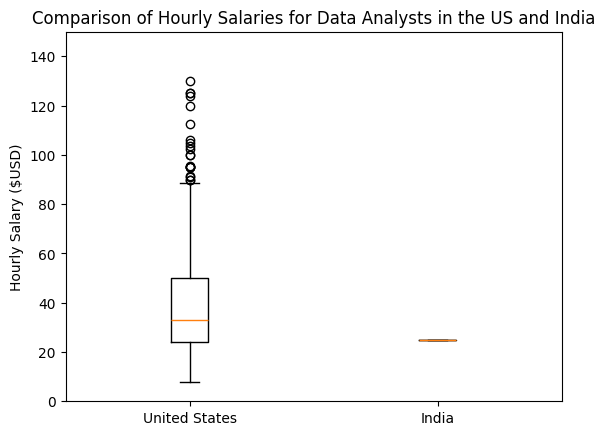

In [53]:
countries = ['United States', 'India']
df_filtered = df[(df['job_country'].isin(countries)) & (df['job_title_short'] == 'Data Analyst')].dropna(subset=['salary_hour_avg'])

country_data = [df_filtered[df_filtered['job_country']==country]['salary_hour_avg'] for country in countries]

plt.boxplot(country_data, labels=countries)
plt.xlabel('')
plt.ylabel('Hourly Salary ($USD)')
plt.ylim(0, 150)
plt.title('Comparison of Hourly Salaries for Data Analysts in the US and India')
plt.show()

C:\Users\Darvi\AppData\Local\Temp\ipykernel_33420\525202527.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(job_list, labels=job_titles)


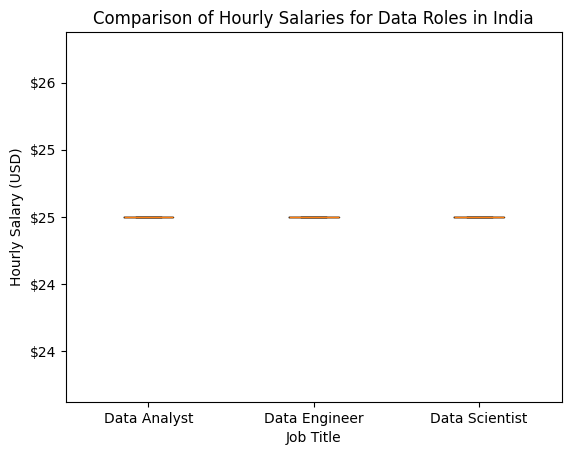

In [54]:
# Filter out data
df_Canada = df[df['job_country'] == 'India'].dropna(subset=['salary_hour_avg'])
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
job_list = [df_Canada[df_Canada['job_title_short'] == job]['salary_hour_avg'] for job in job_titles]

# Plot charts
fig, ax = plt.subplots()
ax.boxplot(job_list, labels=job_titles)
ax.set_xlabel('Job Title')
ax.set_ylabel('Hourly Salary (USD)')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y)}'))
ax.set_title('Comparison of Hourly Salaries for Data Roles in India')
plt.show()

In [55]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


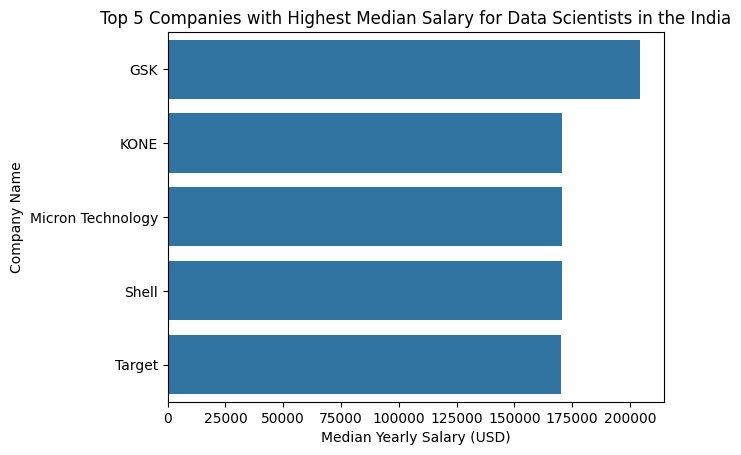

In [56]:
import seaborn as sns
df_DS_IN = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == "India")].dropna(subset=['salary_year_avg']).copy()
top_companies = df_DS_IN.groupby('company_name')['salary_year_avg'].median().nlargest(5).reset_index()

sns.barplot(data=top_companies, x='salary_year_avg', y='company_name')
plt.title('Top 5 Companies with Highest Median Salary for Data Scientists in the India')
plt.xlabel('Median Yearly Salary (USD)')
plt.ylabel('Company Name')
plt.show()


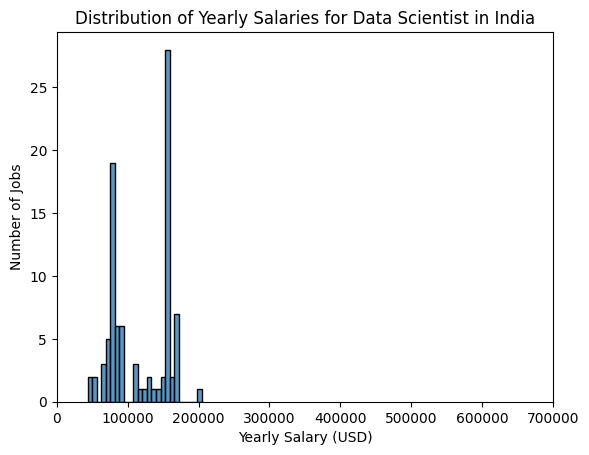

In [57]:
in_ds_jobs = df[(df['job_country'] == 'India') & (df['job_title_short'] == 'Data Scientist')].copy()

in_ds_jobs = in_ds_jobs.dropna(subset=['salary_year_avg'])

sns.histplot(in_ds_jobs['salary_year_avg'], bins=25, kde=False)
plt.title('Distribution of Yearly Salaries for Data Scientist in India')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Number of Jobs')
plt.xlim(0,700000)
plt.show()

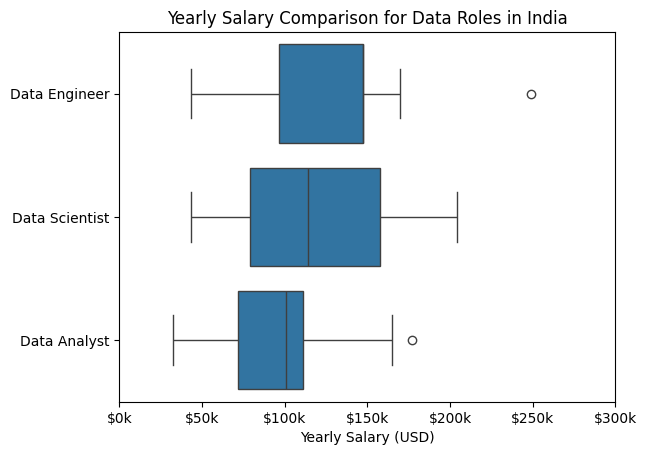

In [58]:
# Filter for Data Analyst, Data Engineer, and Data Scientist job postings in India
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
india_jobs = df[(df['job_country'] == 'India') & (df['job_title_short'].isin(job_titles))]

# Drop NaN values from the 'salary_year_avg' column
india_jobs = india_jobs.dropna(subset=['salary_year_avg'])

# Plot box plot for yearly average salary
sns.boxplot(data=india_jobs, x='salary_year_avg', y='job_title_short')
plt.title('Yearly Salary Comparison for Data Roles in India')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 300000)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
plt.show()

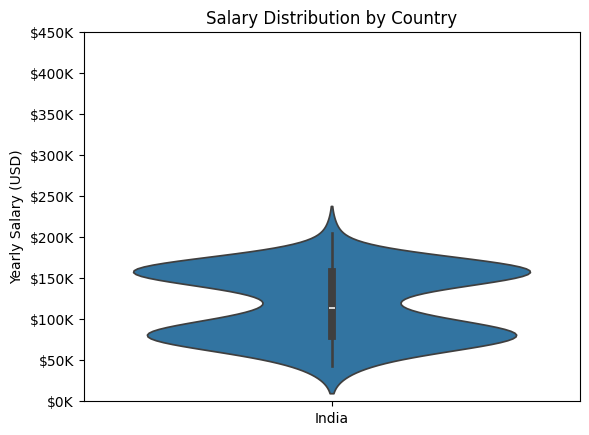

In [59]:
# Filter the DataFrame for Data Scientist job postings in the United States
df_DS_IN = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'India')].dropna(subset=['salary_year_avg'])

# Plot chart
sns.violinplot(x='job_country', y='salary_year_avg', data=df_DS_IN)
plt.title('Salary Distribution by Country')
plt.xlabel('')
plt.ylabel('Yearly Salary (USD)')
plt.ylim(0, 450000)  
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()